In [122]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
import sklearn as sk
import sklearn.metrics as sk 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [123]:
 df = pd.read_csv("/Users/HP/Desktop/EcommerceCustomers.csv")

In [124]:
df.shape

(500, 8)

In [125]:
df.head(15)

,Email,Address,Avatar,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021595,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Email               500 non-null    object 
 1   Address             500 non-null    object 
 2   Avatar              500 non-null    object 
 3   AvgSessionLength    500 non-null    float64
 4   TimeonApp           500 non-null    float64
 5   TimeonWebsite       500 non-null    float64
 6   LengthofMembership  500 non-null    float64
 7   YearlyAmountSpent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [127]:
df.columns

Index(['Email', 'Address', 'Avatar', 'AvgSessionLength', 'TimeonApp',
       'TimeonWebsite', 'LengthofMembership', 'YearlyAmountSpent'],
      dtype='object')

In [128]:
df.isnull().values.any()

False

In [129]:
df.describe()

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [130]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_11340\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
AvgSessionLength,1.000000,-0.027826,-0.034987,0.060247,0.355088
TimeonApp,-0.027826,1.000000,0.082388,0.029143,0.499328
TimeonWebsite,-0.034987,0.082388,1.000000,-0.047582,-0.002641
LengthofMembership,0.060247,0.029143,-0.047582,1.000000,0.809084
YearlyAmountSpent,0.355088,0.499328,-0.002641,0.809084,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_11340\2860495264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


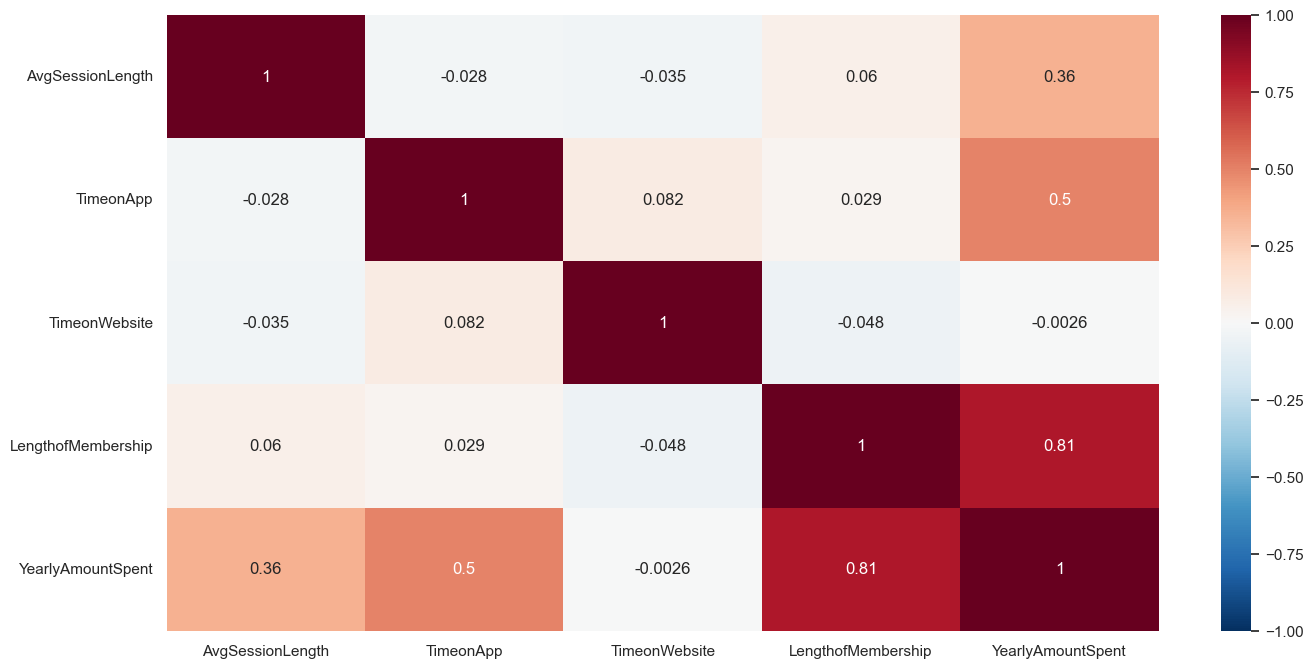

In [131]:
correlation = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot =True, linewidths = 0,vmin=-1,cmap="RdBu_r")
plt.show()

count    500.000000
mean      33.053194
std        0.992563
min       29.532429
25%       32.341822
50%       33.082008
75%       33.711985
max       36.139662
Name: AvgSessionLength, dtype: float64

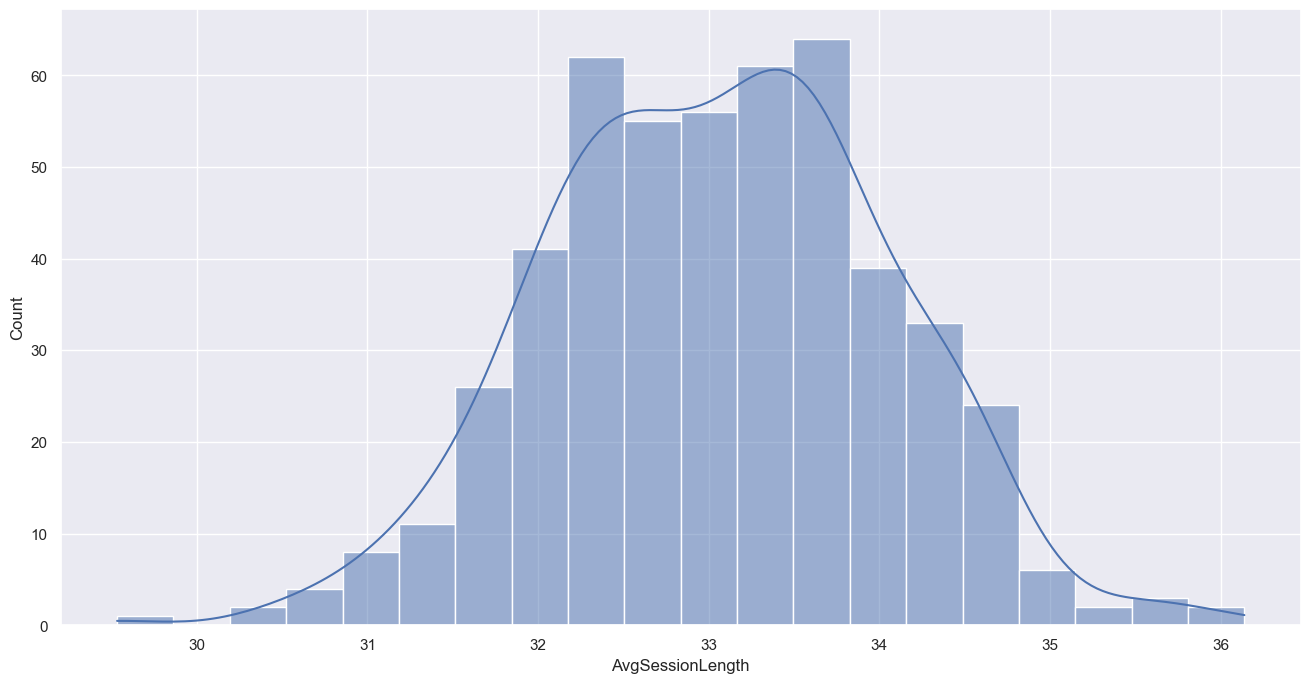

In [132]:
plt.figure(figsize=(16,8))
sns.histplot(df['AvgSessionLength'],kde=True)

df['AvgSessionLength'].describe()


In [133]:
df['AvgSessionLength'].skew()

-0.032174807011080164

In [134]:
#Finding the boundary values
print("Highest allowed",df['AvgSessionLength'].mean()+3*df['AvgSessionLength'].std())
print("Lowest allowed",df['AvgSessionLength'].mean()-3*df['AvgSessionLength'].std())

Highest allowed 36.03088285172089
Lowest allowed 30.07550418475913


In [135]:
#Finding the outliers
df[(df['AvgSessionLength']>36.03088285172089)|(df['AvgSessionLength']<30.07550418475913)]

,Email,Address,Avatar,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
12,knelson@gmail.com,"6705 Miller Orchard Suite 186\nLake Shanestad,...",RoyalBlue,29.532429,10.961298,37.420216,4.046423,408.640351
154,nathan86@hotmail.com,"748 Michael Plaza\nWest Billyside, UT 20799",MidnightBlue,36.139662,12.050267,36.959643,3.864861,595.803819


count    500.000000
mean      12.052488
std        0.994216
min        8.508152
25%       11.388153
50%       11.983231
75%       12.753850
max       15.126994
Name: TimeonApp, dtype: float64

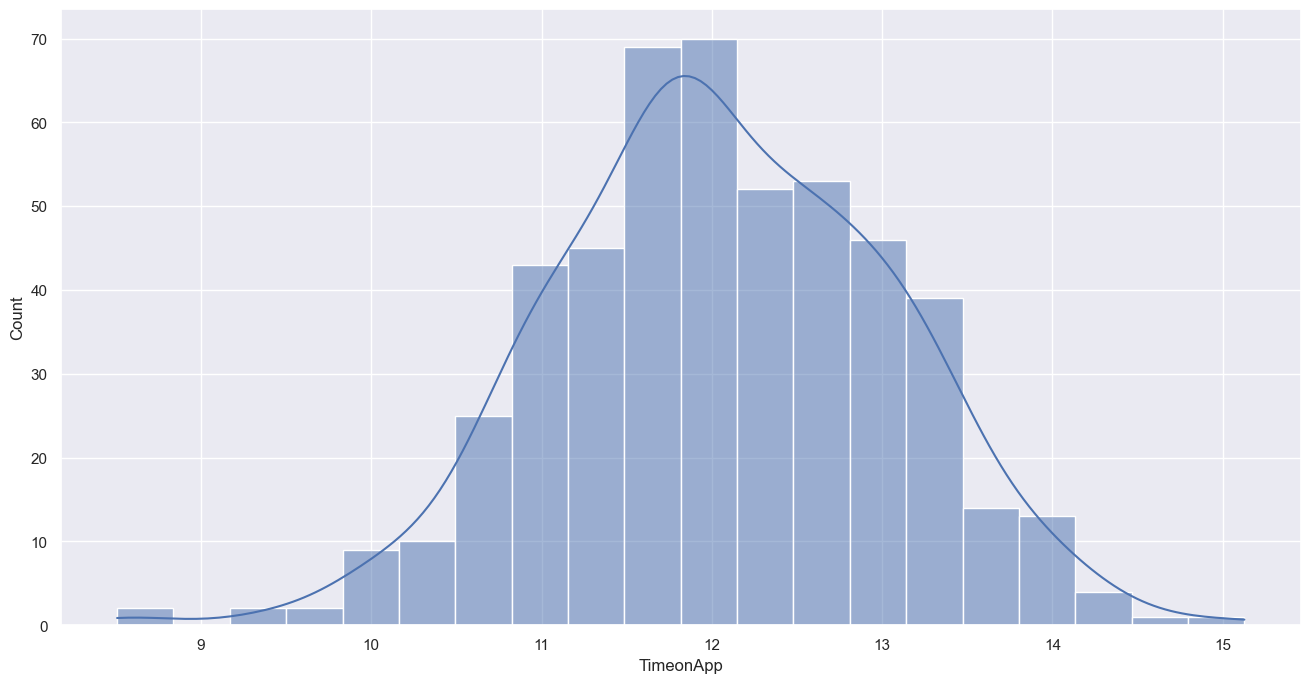

In [136]:
plt.figure(figsize=(16,8))
sns.histplot(df['TimeonApp'],kde=True)


df['TimeonApp'].describe()

In [137]:
df['TimeonApp'].skew()

-0.08912109679800798

In [138]:
#Finding the boundary values
print("Highest allowed",df['TimeonApp'].mean()+3*df['TimeonApp'].std())
print("Lowest allowed",df['TimeonApp'].mean()-3*df['TimeonApp'].std())

Highest allowed 15.035134762315385
Lowest allowed 9.069841111540613


In [139]:
#Finding the outliers
df[(df['TimeonApp']>15.035134762315385)|(df['TimeonApp']<9.069841111540613)]

,Email,Address,Avatar,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
65,kyang@diaz.org,"223 Love Trail Suite 831\nPort Jeffrey, IN 46849",OliveDrab,34.374258,15.126994,37.157624,5.377594,765.518462
309,dblair@gmail.com,"190 Kelley Burg\nWest Juliaport, IA 35826-8163",MediumSlateBlue,34.102279,8.508152,35.462400,1.838211,302.189548
442,martinkristi@sanchez-coleman.com,"PSC 1893, Box 7023\nAPO AA 73445",Lime,34.083663,8.668350,35.906756,2.252446,308.527747


count    500.000000
mean      37.060445
std        1.010489
min       33.913847
25%       36.349257
50%       37.069367
75%       37.716432
max       40.005182
Name: TimeonWebsite, dtype: float64

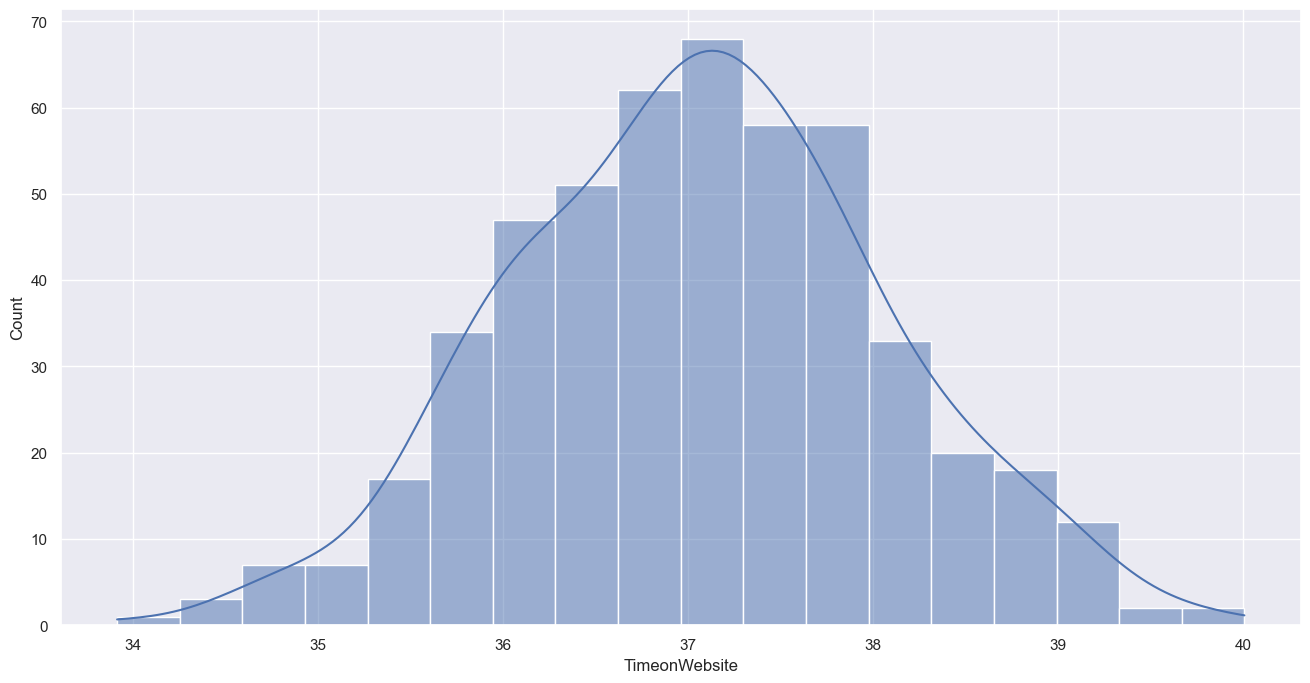

In [140]:
plt.figure(figsize=(16,8))
sns.histplot(df['TimeonWebsite'],kde=True)

df['TimeonWebsite'].describe()


In [141]:
df['TimeonWebsite'].skew()

0.012141880955778964

In [142]:
#Finding the boundary values
print("Highest allowed",df['TimeonWebsite'].mean()+3*df['TimeonWebsite'].std())
print("Lowest allowed",df['TimeonWebsite'].mean()-3*df['TimeonWebsite'].std())

Highest allowed 40.0919121415118
Lowest allowed 34.02897870064821


In [143]:
#Finding the outliers
df[(df['TimeonWebsite']>40.0919121415118)|(df['TimeonWebsite']<34.02897870064821)]

,Email,Address,Avatar,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
157,asilva@yahoo.com,USNV Johnson\nFPO AP 19026,Wheat,34.603311,12.207298,33.913847,6.922689,744.221867


count    500.000000
mean       3.533462
std        0.999278
min        0.269901
25%        2.930450
50%        3.533975
75%        4.126502
max        6.922689
Name: LengthofMembership, dtype: float64

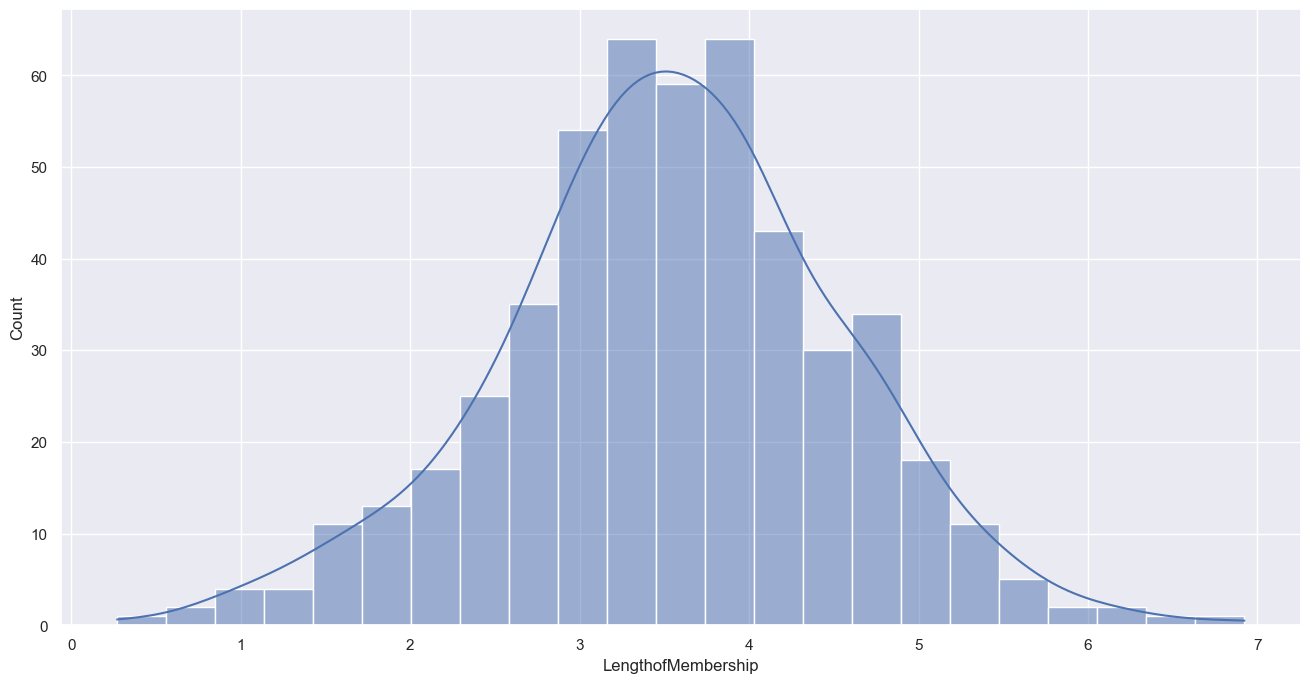

In [144]:
plt.figure(figsize=(16,8))
sns.histplot(df['LengthofMembership'],kde = True)
df['LengthofMembership'].describe()

In [145]:
df['LengthofMembership'].skew()

-0.10660805308554402

In [146]:
#Finding the boundary values
print("Highest allowed",df['LengthofMembership'].mean()+3*df['LengthofMembership'].std())
print("Lowest allowed",df['LengthofMembership'].mean()-3*df['LengthofMembership'].std())

Highest allowed 6.531294063240262
Lowest allowed 0.535629048619739


In [147]:
#Finding the outliers
df[(df['LengthofMembership']>6.531294063240262)|(df['LengthofMembership']<0.535629048619739)]

,Email,Address,Avatar,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
157,asilva@yahoo.com,USNV Johnson\nFPO AP 19026,Wheat,34.603311,12.207298,33.913847,6.922689,744.221867
447,sharongraves@yahoo.com,"73098 Ronald Port\nCliffordborough, MO 37479-9244",Wheat,32.904854,12.556108,37.805509,0.269901,314.438518


count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: YearlyAmountSpent, dtype: float64

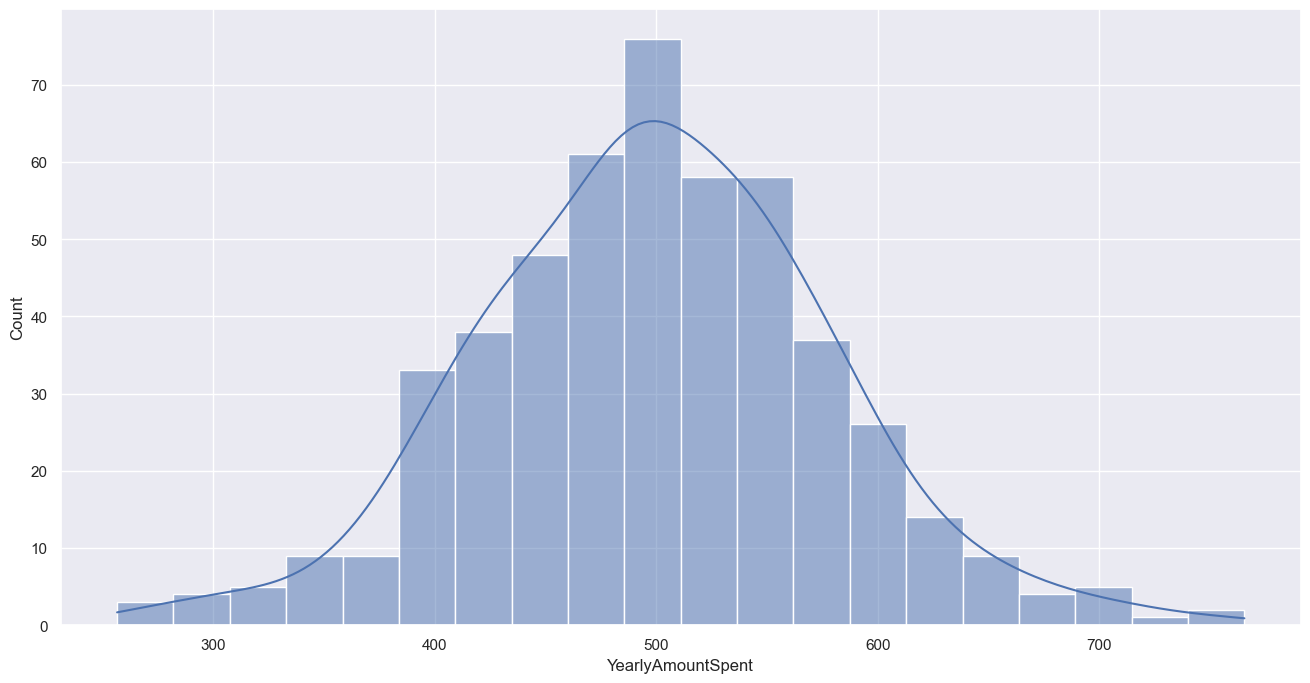

In [148]:
plt.figure(figsize=(16,8))
sns.histplot(df['YearlyAmountSpent'],kde = True)
df['YearlyAmountSpent'].describe()

In [149]:
df['YearlyAmountSpent'].skew()

0.03479018401676141

In [150]:
#Finding the boundary values
print("YearlyAmountSpent",df['YearlyAmountSpent'].mean()+3*df['YearlyAmountSpent'].std())
print("YearlyAmountSpent",df['YearlyAmountSpent'].mean()-3*df['YearlyAmountSpent'].std())

YearlyAmountSpent 737.2583829142776
YearlyAmountSpent 261.36969360732246


In [151]:
#Finding the outliers
df[(df['YearlyAmountSpent']>737.2583829142776)|(df['YearlyAmountSpent']<261.36969360732246)]

,Email,Address,Avatar,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
65,kyang@diaz.org,"223 Love Trail Suite 831\nPort Jeffrey, IN 46849",OliveDrab,34.374258,15.126994,37.157624,5.377594,765.518462
157,asilva@yahoo.com,USNV Johnson\nFPO AP 19026,Wheat,34.603311,12.207298,33.913847,6.922689,744.221867
225,alexandra26@summers-davis.com,Unit 7032 Box 7016\nDPO AE 44749-2992,Navy,32.836941,10.256549,36.143908,0.789520,256.670582


In [174]:
statMDL = smf.ols('YearlyAmountSpent~AvgSessionLength+TimeonApp+TimeonWebsite+LengthofMembership',
data = df).fit()
print(statMDL.summary())         

                            OLS Regression Results                            
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7766.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:04:15   Log-Likelihood:                -1856.9
No. Observations:                 500   AIC:                             3724.
Df Residuals:                     495   BIC:                             3745.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1051.5943     22

In [175]:
x = df[['AvgSessionLength','TimeonApp',
       'LengthofMembership']]
y = df['YearlyAmountSpent']

In [176]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df
     

Intercept: -1038.8417384739098


,Coefficient
AvgSessionLength,25.883808
TimeonApp,38.533691
LengthofMembership,61.792891


In [177]:
predictions = linreg.predict(x_test)
pdf = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
pdf

,Actual,Predicted
241,571.471034,559.783203
448,478.584286,478.312549
75,478.719357,455.136638
212,536.130897,537.715213
481,497.389558,481.400145
...,...,...
230,532.935219,528.546469
435,571.216005,573.230967
132,452.627255,457.243952
49,416.358354,417.514609


In [178]:
pdf.head(10)

,Actual,Predicted
241,571.471034,559.783203
448,478.584286,478.312549
75,478.719357,455.136638
212,536.130897,537.715213
481,497.389558,481.400145
280,511.979860,506.817451
474,492.556834,499.585130
269,585.931844,588.734632
40,532.751788,532.037620
222,502.409785,518.516670


In [179]:
print('Coefficients:', linreg.coef_)
print('Intercept:',linreg.intercept_)
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2',r2_score(y_test,predictions))

Coefficients: [25.88380762 38.53369136 61.79289105]
Intercept: -1038.8417384739098
MAE: 7.382879445086078
MSE 92.76139433398828
RMSE 9.631271688307224
AccuracyII: 98.34620468556689 %
R2 0.9834620468556688


In [180]:
print("Train set Accuaracy",r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy", r2_score(y_test,linreg.predict(x_test)))

Train set Accuaracy 0.9844739951584378
Test set Accuracy 0.9834620468556688


<Axes: xlabel='YearlyAmountSpent'>

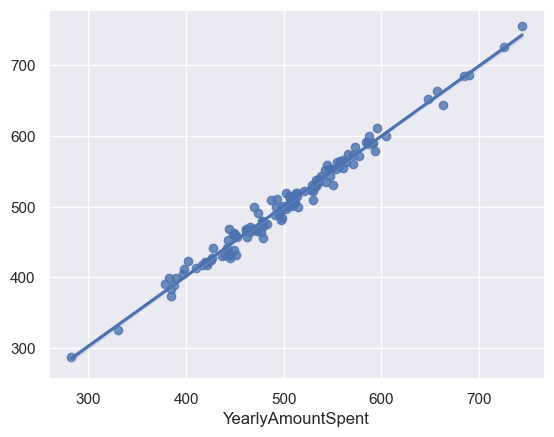

In [181]:
sns.regplot(x=y_test, y=predictions)

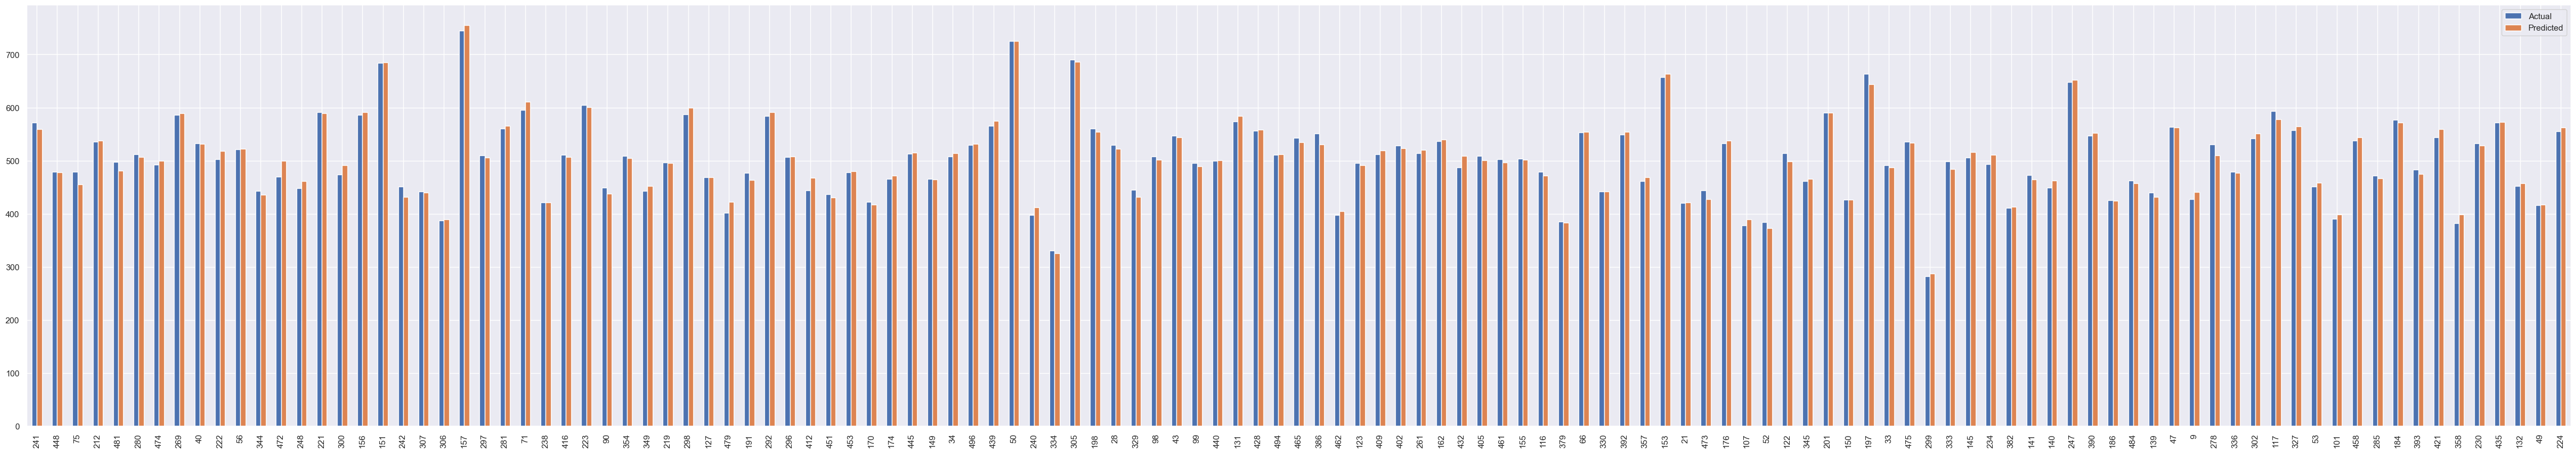

In [182]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df2.plot(kind='bar',figsize=(60,10))

plt.show()

In [183]:
#Now we can predict values based on this model;AvgSessionLength=34.497268 ,TimeonApp= 12.655651 and LengthofMembership =4.082621	
new_observation  = [[34.497268,12.655651,4.082621]]
linreg.predict(new_observation)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([594.02481412])